In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score, accuracy_score, f1_score
from google.colab import drive
drive.mount('/content/drive')
dataset=pd.read_csv("/content/drive/MyDrive/dataset2.csv")
"""print (dataset.shape)
dataset=dataset.sample(frac=1, replace=False)#shuffling dataset
print (dataset.shape)"""
dataset = dataset.replace(float('-inf'), 0)
labels=pd.DataFrame(dataset["label"])
dataset=dataset.drop("label",axis=1)


Mounted at /content/drive


this section fit the model using 3 nearest neighbor and 6 classes

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train['label'].ravel())
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)

Precision:  0.3602144769014491
Accuracy:  0.3664717348927875
F1 Score:  0.3548463787487592
[[100  26  18   9   6   7]
 [ 50  71  31   1   6   6]
 [ 43  42  56   4  12   2]
 [ 21   8   6  71  39  24]
 [ 25  15  15  60  44  35]
 [ 27  19   7  48  38  34]]


this section fit the model using 9 nearest neighbor and 6 classes

In [14]:
k = 9
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train['label'].ravel())
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)

Precision:  0.38845211287710535
Accuracy:  0.398635477582846
F1 Score:  0.387827899766835
[[91 36 14 14  8  3]
 [32 90 33  2  5  3]
 [20 56 70  4  7  2]
 [22  8  1 77 33 28]
 [13 23 18 47 45 48]
 [20 11 12 53 41 36]]


computing the optimal K

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)

acc=[]
pre=[]
f1=[]
for j in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=j)
  knn.fit(X_train, y_train['label'].ravel())
  y_pred = knn.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')

  accuracy = accuracy_score(y_test, y_pred)

  f1_s = f1_score(y_test, y_pred, average='weighted')

  pre.append(precision)
  acc.append(accuracy)
  f1.append(f1_s)

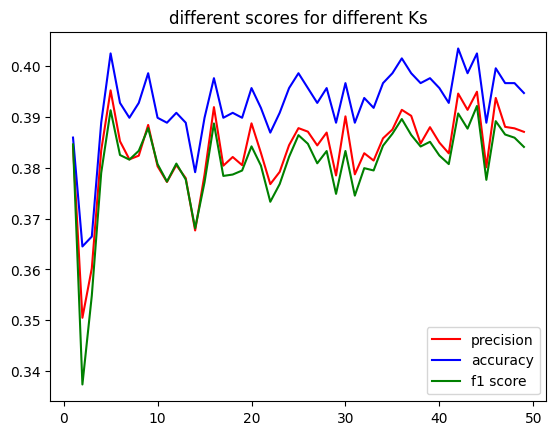

In [9]:
import matplotlib.pyplot as plt
import numpy as np
x=np.array(range(1,50))
plt.plot(x,pre,c="r",label="precision")
plt.plot(x,acc,c="b",label="accuracy")
plt.plot(x,f1,c="g",label="f1 score")
plt.title('different scores for different Ks')
plt.legend()

here we convert our dataset to two classes , real and fake, and hence we don't need the channel means, we drop them as well

In [10]:
for index, row in labels.iterrows():
    if "fake" in row["label"]:
        row["label"]="fake"
    else :
        row["label"]="real"


In [11]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)

binary KNN with the k of 12

In [12]:
k = 9
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train['label'].ravel())
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)

Precision:  0.8329081428416462
Accuracy:  0.8294346978557505
F1 Score:  0.829427082429146
[[426  64]
 [111 425]]


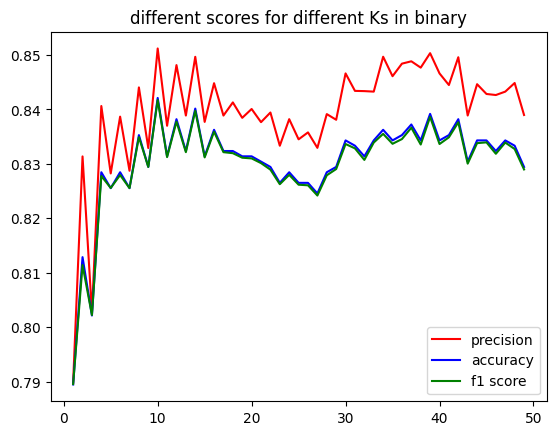

In [14]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)

acc=[]
pre=[]
f1=[]
for j in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=j)
  knn.fit(X_train, y_train['label'].ravel())
  y_pred = knn.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')

  accuracy = accuracy_score(y_test, y_pred)

  f1_s = f1_score(y_test, y_pred, average='weighted')

  pre.append(precision)
  acc.append(accuracy)
  f1.append(f1_s)
import matplotlib.pyplot as plt
import numpy as np
x=np.array(range(1,50))
plt.plot(x,pre,c="r",label="precision")
plt.plot(x,acc,c="b",label="accuracy")
plt.plot(x,f1,c="g",label="f1 score")
plt.title('different scores for different Ks in binary')
plt.legend()

from here we use our enhanced dataset which has 3 additional features. these additiona features are the variance of colors in each channel

Precision:  0.8026620758179802
Accuracy:  0.8021442495126706
F1 Score:  0.8022317284627442
[[396  94]
 [109 427]]


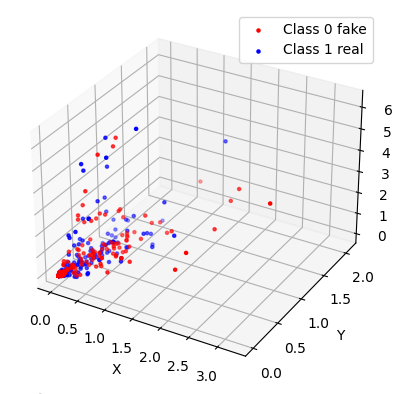

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train['label'].ravel())
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)


cls0=[]
cls1=[]

for row in range(len(y_pred)):
    if y_pred[row]=='fake':
        cls0.append([dataset.iloc[row]['hist_g'],dataset.iloc[row]['magnitude_spectrum'],dataset.iloc[row]['hist_r']])
    else :
        cls1.append([dataset.iloc[row]['hist_g'],dataset.iloc[row]['magnitude_spectrum'],dataset.iloc[row]['hist_r']])
cls0=np.array(cls0)
cls1=np.array(cls1)

x = cls0[:, 0]
y = cls0[:, 1]
z = cls0[:, 2]
x1 = cls1[:, 0]
y1 = cls1[:, 1]
z1 = cls1[:, 2]

# Define colors for the scatter plot
colors = ['red', 'blue', 'green']  # Adjust colors as needed

# Create a 3D figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
ax.scatter(x, y, z, s=5, color=colors[0], label='Class 0 fake')
ax.scatter(x1, y1, z1, s=5, color=colors[1], label='Class 1 real')
# Add labels, legend, etc. as necessary
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.view_init(elev=45, azim=45)
ax.legend()

# Show the plot
plt.show()